In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
df = pd.read_excel('../data/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.xlsx')

In [4]:
df.shape

(548, 7)

In [34]:
df.head(15)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,Week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


# 2. Data Analysis

#### - Total Sales

In [6]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

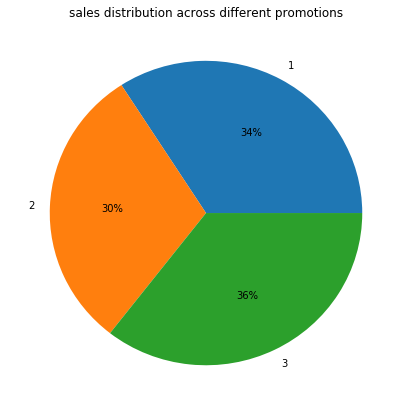

In [7]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

#### - Market Size

In [8]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

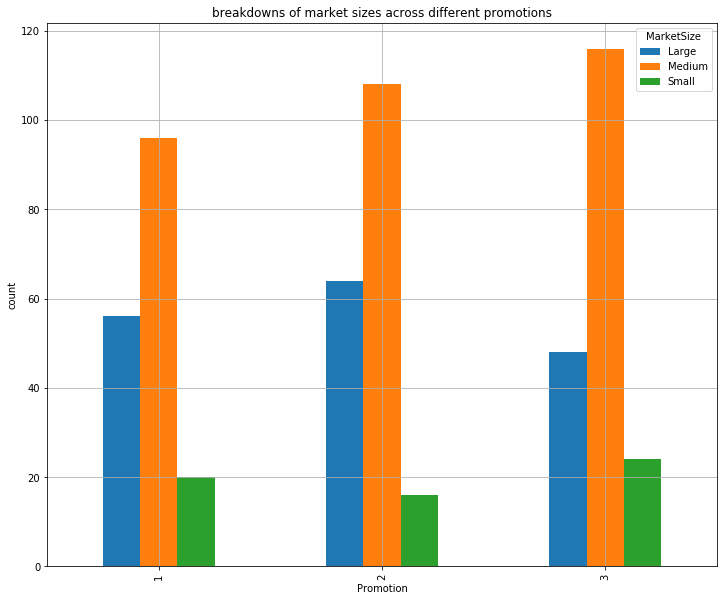

In [9]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

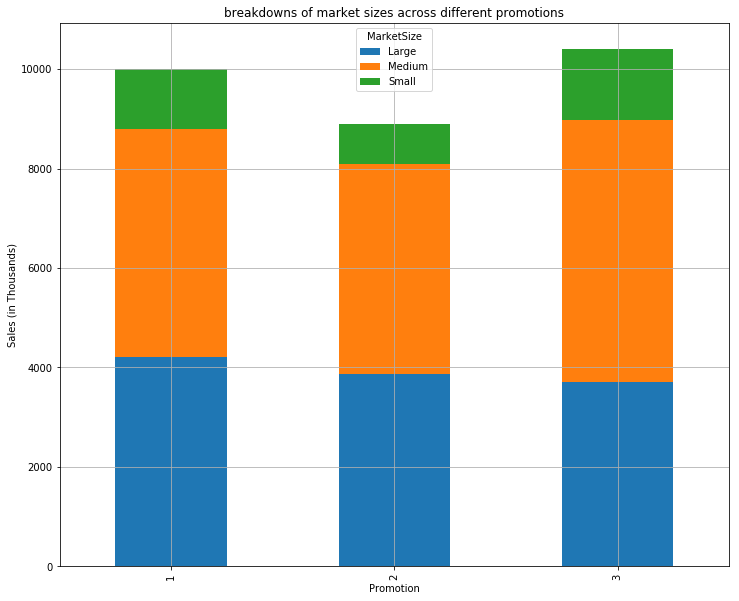

In [10]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

#### - Store Age

In [11]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

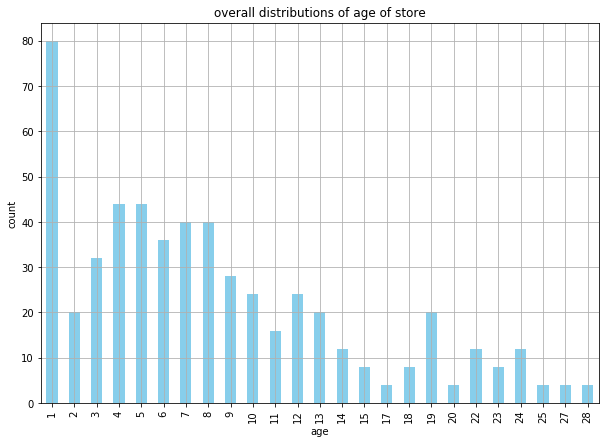

In [12]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

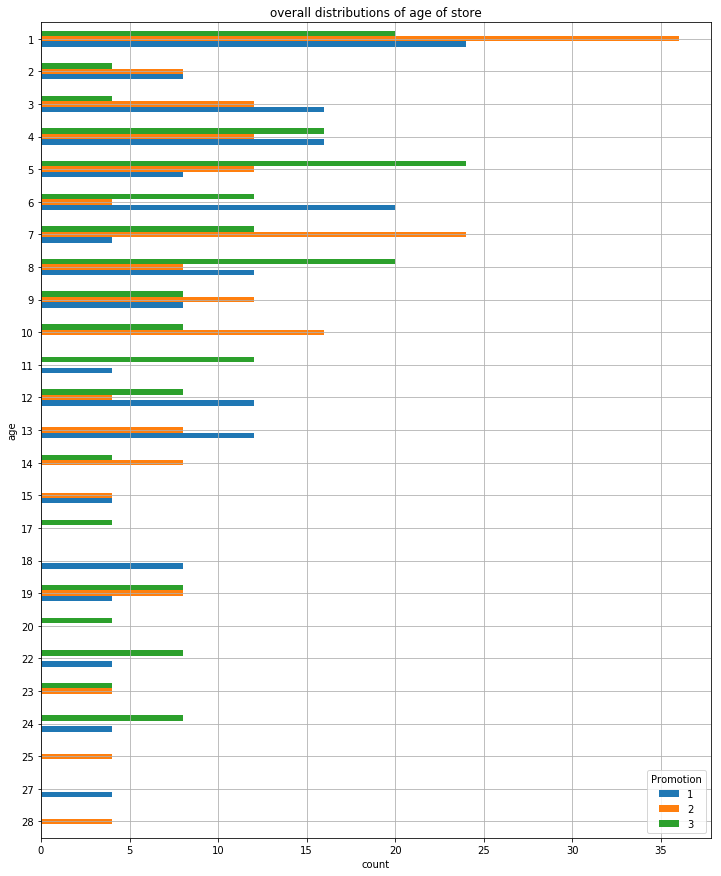

In [13]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [14]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


#### - Week Number

In [15]:
df.groupby('Week').count()['MarketID']

Week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [16]:
df.groupby(['Promotion', 'Week']).count()['MarketID']

Promotion  Week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

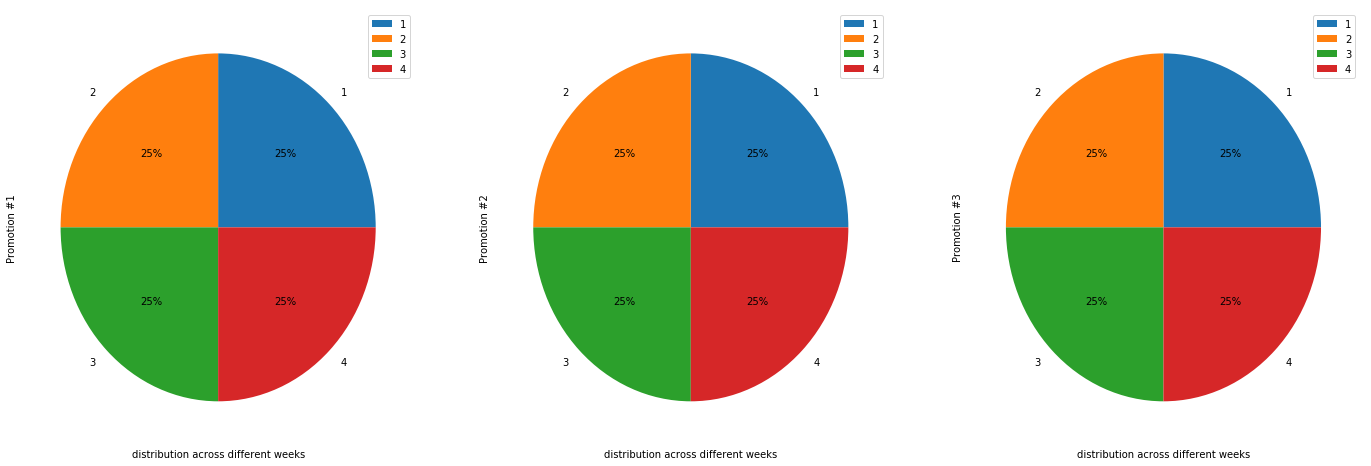

In [17]:
ax1, ax2, ax3 = df.groupby(
    ['Week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

# 3. Statistical Significance

In [18]:
import numpy as np
from scipy import stats

#### - t-test

In [19]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [20]:
stds = df.groupby('Promotion').std()['SalesInThousands']
stds

Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [21]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### - Promotion 1 vs. 2

In [22]:
t_1_vs_2 = (
    means.iloc[0] - means.iloc[1]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
)

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [23]:
t_1_vs_2

6.427528670907475

In [24]:
p_1_vs_2

4.143296816749853e-10

#### - using scipy

In [25]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [26]:
t

6.42752867090748

In [27]:
p

4.2903687179871785e-10

#### - Promotion 1 vs. 3

In [28]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2])
)

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [29]:
t_1_vs_3

1.5560224307759116

In [30]:
p_1_vs_3

0.12058631176433687

#### - using scipy

In [31]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [32]:
t

1.5560224307758634

In [33]:
p

0.12059147742229478